### Importação das Bibliotecas

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Importo meu dataframe do diretório '../dados'

In [75]:
ibov_df = pd.read_csv('../../dados/IBOV.csv',sep=',')

### Trato os NA's do meu dataframe

In [76]:
#verifico se existem NA's
ibov_df.isna().sum()

#caso existissem eu usaria dropna para removê-los ou algum fillna para preenchê-los ou ainda o interpolate para preenchê-los com
#uma regressão linear

Data        0
Open        0
High        0
Low         0
Close       0
Volume      0
Ajustado    0
dtype: int64

### Trato as Datas (Converto de string pra datetime)

In [77]:
ibov_df['Data'] = ibov_df['Data'].apply(lambda x : datetime.strptime(x,'%m/%d/%Y'))
type(ibov_df['Data'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Observo algumas medidas estatísticas do dataframe (textual e visualmente)

In [78]:
ibov_df.drop(columns=['Data']).describe().loc[['mean','50%','std','min','max']]

,Open,High,Low,Close,Volume,Ajustado
mean,46400.671756,46890.422317,45917.402335,46416.205209,7.671497e+06,46416.205209
50%,51613.000000,52187.500000,51055.000000,51615.000000,2.180700e+06,51615.000000
std,20643.066298,20809.302788,20476.372476,20648.704386,2.553194e+07,20648.704386
min,8397.000000,8513.000000,8225.000000,8371.000000,0.000000e+00,8371.000000
max,89820.000000,91242.000000,89429.000000,89820.000000,2.322653e+08,89820.000000


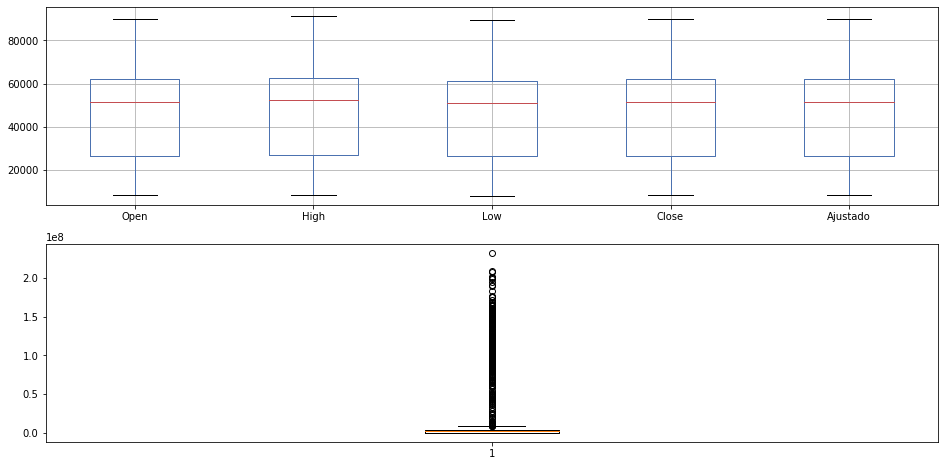

In [79]:
with plt.style.context('seaborn-deep'):
    fig = plt.figure(figsize=(16,8))
    plt.subplot(2,1,1)
    ibov_df.drop(columns=['Volume','Data']).boxplot()
    plt.subplot(2,1,2)
    plt.boxplot(ibov_df['Volume']);

plt.savefig('analise_outliers.png')

#percebo claramente após as análises das medidas estatísticas que a coluna 'Volume' apresenta outliers e as demais colunas
#apresentam certa proximidade entre a mediana e a média (o que evidencia um conjunto sem outliers)

# Começo a analisar a distribuição dos retornos

### Crio duas novas colunas chamadas 'Retornos' e 'Retornos Ajustados' no dataframe

In [80]:
ibov_df['Retornos'] = ibov_df['Close'] - ibov_df['Open']
ibov_df['Retornos Ajustados'] = ibov_df['Ajustado'] - ibov_df['Open']

### Analiso as medidas estatísticas dos retornos

In [81]:
ibov_df['Retornos'].describe()

count    4454.000000
mean       15.533453
std       799.251492
min     -5939.000000
25%      -353.000000
50%        25.000000
75%       396.000000
max      5220.000000
Name: Retornos, dtype: float64

In [82]:
ibov_df['Retornos Ajustados'].describe()

count    4454.000000
mean       15.533453
std       799.251492
min     -5939.000000
25%      -353.000000
50%        25.000000
75%       396.000000
max      5220.000000
Name: Retornos Ajustados, dtype: float64

### Faço o plot da distribuição de frequência dos retornos

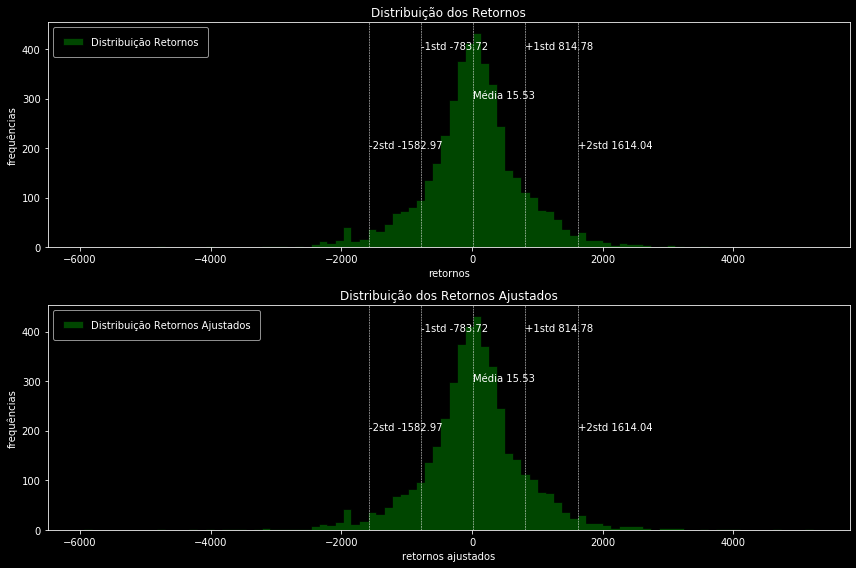

In [83]:
hist_config = dict(histtype='stepfilled',bins=90,alpha=0.7,color='darkgreen',edgecolor='black')
legends_config = dict(loc='upper left',frameon=True,shadow=True,framealpha=0.7,fancybox=True,ncol=1,borderpad=1)
lines_config = dict(color='white',linestyle='--',linewidth=0.5)
text_config = dict(size=10,color='white')

mean_retornos = ibov_df['Retornos'].mean()
std_retornos = ibov_df['Retornos'].std()
mean_retornos_ajustados = ibov_df['Retornos Ajustados'].mean()
std_retornos_ajustados = ibov_df['Retornos Ajustados'].std()

with plt.style.context('dark_background'):
    fig , subplots = plt.subplots(2,figsize=(12,8))
    
    subplots[0].hist(ibov_df['Retornos'],**hist_config)
    subplots[0].set(title='Distribuição dos Retornos',label='Retornos',xlabel='retornos',ylabel='frequências')
        
    subplots[1].hist(ibov_df['Retornos Ajustados'],**hist_config)
    subplots[1].set(title='Distribuição dos Retornos Ajustados',label='Retornos Ajustados',xlabel='retornos ajustados',ylabel='frequências')
   
    subplots[0].legend(['Distribuição Retornos'],**legends_config)
    subplots[1].legend(['Distribuição Retornos Ajustados'],**legends_config)
    

    subplots[0].axvline(mean_retornos - 2 * std_retornos,**lines_config)
    subplots[0].text(mean_retornos - 2 * std_retornos,200,'-2std %.2f'%(mean_retornos- 2 * std_retornos),**text_config)
    
    subplots[0].axvline(mean_retornos - std_retornos,**lines_config)
    subplots[0].text(mean_retornos - std_retornos,400,'-1std %.2f'%(mean_retornos-std_retornos),**text_config)

    subplots[0].axvline(mean_retornos,**lines_config)
    subplots[0].text(mean_retornos,300,'Média %.2f'%mean_retornos,**text_config)
    
    subplots[0].axvline(mean_retornos + std_retornos,**lines_config)
    subplots[0].text(mean_retornos + std_retornos,400,'+1std %.2f'%(mean_retornos+std_retornos),**text_config)

    subplots[0].axvline(mean_retornos + 2 * std_retornos,**lines_config)
    subplots[0].text(mean_retornos + 2 * std_retornos,200,'+2std %.2f'%(mean_retornos+ 2 * std_retornos),**text_config)
   


    
    subplots[1].axvline(mean_retornos_ajustados - 2 * std_retornos_ajustados,**lines_config)
    subplots[1].text(mean_retornos_ajustados - 2 * std_retornos_ajustados,200,'-2std %.2f'%(mean_retornos_ajustados- 2 * std_retornos_ajustados),**text_config)
    
    subplots[1].axvline(mean_retornos_ajustados - std_retornos_ajustados,**lines_config)
    subplots[1].text(mean_retornos_ajustados - std_retornos_ajustados,400,'-1std %.2f'%(mean_retornos_ajustados-std_retornos_ajustados),**text_config)

    subplots[1].axvline(mean_retornos_ajustados,**lines_config)
    subplots[1].text(mean_retornos_ajustados,300,'Média %.2f'%mean_retornos_ajustados,**text_config)
    
    subplots[1].axvline(mean_retornos_ajustados + std_retornos_ajustados,**lines_config)
    subplots[1].text(mean_retornos_ajustados + std_retornos_ajustados,400,'+1std %.2f'%(mean_retornos_ajustados+std_retornos_ajustados),**text_config)

    subplots[1].axvline(mean_retornos_ajustados + 2 * std_retornos_ajustados,**lines_config)
    subplots[1].text(mean_retornos_ajustados + 2 * std_retornos_ajustados,200,'+2std %.2f'%(mean_retornos_ajustados+ 2 * std_retornos_ajustados),**text_config)
   
    
    fig.tight_layout();
    
    plt.savefig('analise_retornos.png')


### Salvo o meu Dataframe com as colunas dos retornos

In [84]:
ibov_df.to_csv('ibov.csv')
#ibov_df.to_excel('ibov.xlsx')
#json = ibov_df.to_json()
#html = ibov_df.to_html("ibov.html")

# Verificando Normalidade da distribuição dos retornos e dos retornos ajustados

### Verificando normalidade usando QQ-plot

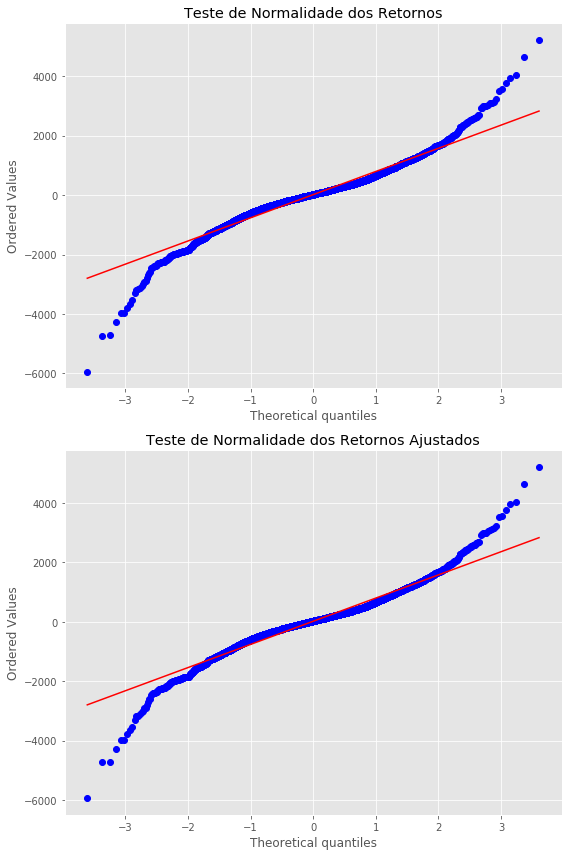

In [85]:
import scipy.stats as stats

with plt.style.context('ggplot'):
    fig, subplots = plt.subplots(2,figsize=(8,12))
    
    stats.probplot(ibov_df['Retornos'],plot=subplots[0],fit=True)
    stats.probplot(ibov_df['Retornos Ajustados'],plot=subplots[1],fit=True)
    
    subplots[0].set(title='Teste de Normalidade dos Retornos')
    subplots[1].set(title='Teste de Normalidade dos Retornos Ajustados')

    fig.tight_layout();
    plt.savefig('teste_normalidade_retornos.png')

### Testando normalidade usando o teste de Kolmogorov-Smirnov (KS Test)

In [89]:
mean = ibov_df['Retornos'].mean()
std = ibov_df['Retornos'].std()
count = ibov_df['Retornos'].count()

statistic , pvalue = stats.kstest(ibov_df['Retornos'],cdf='norm',args=(mean,std),N=count)
#print(f"Statistic: {statistic}\nP-Value: {pvalue}")

#A fórmula abaixo segue a tabela estatística de Kolmogorov-Smirnov encontrada em https://www.real-statistics.com/statistics-tables/kolmogorov-smirnov-table/
ks_critical = ( 1.35810 / ( count ** (1/2) ) )
if statistic <= ks_critical:
    print("CONCLUSÃO: Segundo o teste de Kolmogorov-Smirnov, a distribuição dos retornos é uma distribuição normal (95% de confiança).")
else:
    print("CONCLUSÃO: Segundo o teste de Kolmogorov-Smirnov, a distribuição dos retornos NÃO é uma distribuição normal (95% de confiança).")

CONCLUSÃO: Segundo o teste de Kolmogorov-Smirnov, a distribuição dos retornos NÃO é uma distribuição normal (95% de confiança).


In [88]:
mean_ajustados = ibov_df['Retornos Ajustados'].mean()
std_ajustados = ibov_df['Retornos Ajustados'].std()
count_ajustados = ibov_df['Retornos Ajustados'].count()

statistic , pvalue = stats.kstest(ibov_df['Retornos Ajustados'],cdf='norm',args=(mean_ajustados,std_ajustados),N=count_ajustados)
#print(f"Statistic: {statistic}\nP-Value: {pvalue}")

#A fórmula abaixo segue a tabela estatística de Kolmogorov-Smirnov encontrada em https://www.real-statistics.com/statistics-tables/kolmogorov-smirnov-table/
ks_critical = ( 1.35810 / ( count ** (1/2) ) )
if statistic <= ks_critical:
    print("CONCLUSÃO: Segundo o teste de Kolmogorov-Smirnov, a distribuição dos retornos ajustados é uma distribuição normal (95% de confiança).")
else:
    print("CONCLUSÃO: Segundo o teste de Kolmogorov-Smirnov, a distribuição dos retornos ajustados NÃO é uma distribuição normal (95% de confiança).")

CONCLUSÃO: Segundo o teste de Kolmogorov-Smirnov, a distribuição dos retornos ajustados NÃO é uma distribuição normal (95% de confiança).
